# General objectives
Creation of a database with 10.000 most listened songs in the last century on Brazilian radios and their lyrics.
   We intent to get insights by visualizing the evolution scenario, looking for trends and factors that indicate a greater probability of success for a new song.

#PART I - Retriving the Data

The website "https://maistocadas.mus.br/" offers static information about musics in Brazil. In this part we are going to retrive from it a list of the 100 most listened songs on stations radios in Brazil for each year, from 1920 to 2020. Then we are going to generate an organized Dataframe, compreending in the name of the song, name of artist, year of rank, and position in rank. 

After that, we will retrive the lyrics of all those songs from the website "https://www.letras.mus.br/" and add then to our Data.




In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import re


In [ ]:
#Return a raw line (bs4.element.Tag) containing the 100 most played songs of that year (song, artist, repetitions)
def read_url_2016_2020(year):
  url_list = ("https://maistocadas.mus.br/", str(year), '/')
  url = ''.join(url_list)
  req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
  webpage = urlopen(req).read()
  bs = BeautifulSoup(webpage, 'html.parser')
  lines = bs.find('div', {'class':'lista'})
  return lines

#Return a raw line (bs4.element.Tag) containing the 100 most played songs of that year (song, artist)
def read_url_1920_2015(year):
  url_list = ("https://maistocadas.mus.br/", str(year), '/')
  url = ''.join(url_list)
  req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
  webpage = urlopen(req).read()
  bs = BeautifulSoup(webpage, 'html.parser')
  lines = bs.find('div', {'class':'lista'})
  final_lines = lines.find_all('li')
  return final_lines

#Note that we have two functions due to changes in the site structure for the most recent years

In [ ]:
 #Transfor the lines (bs4.element.Tag) in a pretreated list

 def create_list_2020(lines):
  Raw_list =[line.text for line in lines][1]
  Raw_list = Raw_list.replace('Tocou','')
  Raw_list = Raw_list.replace('vezes','')
  Raw_list = Raw_list.replace('(','')
  geral_list = re.split(r'[–)]',Raw_list)
  return geral_list
 
 def create_list_2015_2019(lines):
  Raw_list =[line.text for line in lines][1]
  Raw_list = Raw_list.replace('Tocou','')
  Raw_list = Raw_list.replace('vezes','')
  Raw_list = Raw_list.replace('.','')
  Raw_list = re.sub('\d','',Raw_list)
  geral_list = re.split('[–]',Raw_list)
  return geral_list

def create_list_1920_2015(lines):
  Raw_list =[line.text for line in lines]
  geral_list=[]
  for item in Raw_list:
    split_item = item.split("–")
    geral_list.append(split_item[0])
    geral_list.append(split_item[1])
  return geral_list

In [ ]:
#Creates a fully treated list with only the artists names

def artist_list_1920_2019(geral_list):  
  artist_list = []
  count=1
  while count< len(geral_list):
    artist_list.append(geral_list[count])
    count+=2
  #We are adding '-' between the artist names because this will help with the  Web Scraping of the lyrics later.
  final_artist_list = [artist.strip().replace(' ',"-") for artist in artist_list ]
  if len(final_artist_list)==101:
    final_artist_list.pop()
  return final_artist_list

def artist_list_2020(geral_list):
  artist_list = [i.strip().replace(' ',"-") for i in geral_list if geral_list.index(i) in [1+3*j for j in range(101)] ] 
  if len(artist_list)==101:
    artist_list.pop()
  return artist_list


In [ ]:
#Creates a fully treated list with only the musics names

def music_list_1920_2019(geral_list):
  music_list =[]
  count=0
  while count< len(geral_list):
    music_list.append(geral_list[count])
    count+=2
  #Again, we are add '-' between the music names because this will help with the  Web Scraping of the lyrics later.
  final_music_list =[i.strip().replace(' ',"-")for i in music_list]   
  if len(final_music_list)==101:
    final_music_list.pop()
  return final_music_list

def music_list_2020(geral_list):
  music_list =[i.strip().replace(' ',"-") for i in geral_list if geral_list.index(i) in [3*j for j in range(102)] ]
  if len(music_list)==101:
    music_list.pop()
  return music_list

In [ ]:
#Creates a DF for the desired year containing the top 100 musics of that year (musics, artists, year and position of the song)
#Note that because a lack of information on the used site, for 1920-1926 we only have 40 musics, and for 1927 we have 60.

def Create_DataFrame(year):
  if year >=2015 and year <=2020:
    lines = read_url_2016_2020(year)
  else:
    lines = read_url_1920_2015(year)
  if year == 2020:
    geral_list = create_list_2020(lines)
    artist_list = artist_list_2020(geral_list)
    music_list = music_list_2020(geral_list)
  elif year >=2015 and year <2020:
    geral_list =create_list_2015_2019(lines)
    artist_list = artist_list_1920_2019(geral_list)
    music_list = music_list_1920_2019(geral_list)
  elif year >1900 and year <2015:
    geral_list = create_list_1920_2015(lines)
    artist_list = artist_list_1920_2019(geral_list)
    music_list = music_list_1920_2019(geral_list)
  year_df = pd.DataFrame({"music":music_list, "artist":artist_list, "year":year, "position":range(1,len(artist_list)+1)})
  return year_df

In [ ]:
#Run a loop to create a DF containing the top 100 musics for each of the last 100 years

years_1920_2020 = pd.DataFrame({"music": [], "artist":[] , "year": [], "position":[]})
for year in range (1920,2021):
  year_df = Create_DataFrame(year)
  years_1920_2020 = pd.concat([years_1920_2020, year_df])
years_1920_2020 = years_1920_2020.reset_index(drop = True)

years_1920_2020

,music,artist,year,position
0,Fala-Meu-Louro,Francisco-Alves,1920.0,1.0
1,Quem-Vem-Atrás-Fecha-a-Porta,Bahiano-&-Izaltina,1920.0,2.0
2,Caboca-Bunita,Mário-Pinheiro,1920.0,3.0
3,Pois-Não,Orquestra-Eduardo-Souto,1920.0,4.0
4,Dardanella,Ben-Selvin,1920.0,5.0
...,...,...,...,...
9634,Fica,BFF-Girls,2020.0,96.0
9635,Break-my-heart,Dua-Lipa,2020.0,97.0
9636,Casal-raiz,Xand-Avião,2020.0,98.0
9637,Chega-chora,Diego-e-Arnaldo,2020.0,99.0


In [ ]:
#Save the DF
years_1920_2020.to_csv('years_1920_2020.csv')


Now we are going to retrieve all the lyrics for each music of the DF created above:

In [ ]:
#Enter with the name of artist and name of song
#Return a raw line (bs4.element.ResultSet) containing the lyric or 0 if the lyric was not found 

def url_lyric(music,artist):
 url_list = ("https://www.letras.mus.br/", str(artist),"/", str(music),"/")
 url = ''.join(url_list)
 req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
 try:
   webpage = urlopen(req).read()
   bs = BeautifulSoup(webpage, 'html.parser')
   lines =bs.find('div', {'class':'cnt-letra p402_premium'})
   final_lines = lines.find_all('p')
   return final_lines
 except:
     return 0


In [ ]:
#Transfor the line(bs4.element.ResultSet) into a pretreated string

def lyric_string(lyric_lines): 
  raw_lyric_string = ''
  if lyric_lines != 0:
    for line in lyric_lines:
      raw_lyric_string =raw_lyric_string +  " " + str(line) + ' '
    lyric_string1 = re.sub("<br>",'. ',raw_lyric_string)
    lyric_string2 = re.sub('</br>',".",lyric_string1)
    lyric_string3 = re.sub('<br/>',". ",lyric_string2)
    lyric_string4 = re.sub('<p>',"",lyric_string3)
    lyric_string5 = re.sub('</p>',"",lyric_string4)
    return lyric_string5
  else: 
    return 0

In [ ]:
#Creates a series containing all the lyrics for the entered year

def lyrics_from_year(year):
  year_rank = years_1920_2020.loc[years_1920_2020.year == year].reset_index(drop =True)
  lyric_list =[]
  for i in range (len(year_rank)):
    lyric_line = url_lyric(year_rank['music'][i],year_rank['artist'][i])
    new_lyric_string = lyric_string(lyric_line)
    lyric_list.append(new_lyric_string)
  lyric_series = pd.Series(data =lyric_list,name = "lyrics" )
  return lyric_series


In [ ]:
#Loop to create a serie with all the lyrics fron year 1920-1960
final_lyric_series = pd.Series(name = "lyrics")
for year in range (1920,1960):
  lyrics_serie = lyrics_from_year(year)
  final_lyric_series = pd.concat([final_lyric_series, lyrics_serie])
  print(year)


In [ ]:
#Loop to create a serie with all the lyrics fron year 1960-200
for year in range (1960,2000):
  lyrics_serie = lyrics_from_year(year)
  final_lyric_series = pd.concat([final_lyric_series, lyrics_serie])
  print(year)


In [ ]:
#Loop to create a serie with all the lyrics fron year 2000-2020
for year in range (2000,2021):
  lyrics_serie = lyrics_from_year(year)
  final_lyric_series = pd.concat([final_lyric_series, lyrics_serie])
  print(year)

In [ ]:
#Add the lyrics to the DF 
years_1920_2020['lyric'] = final_lyric_series.reset_index(drop=True)
years_1920_2020

In [ ]:
#Save the DF
years_1920_2020.to_csv('years_1920_2020.csv', index = False)

In [ ]:
years_1920_2020

,music,artist,year,position,lyrics
0,Fala-Meu-Louro,Francisco-Alves,1920.0,1.0,A Bahia não dá mais coco. para botar na tapio...
1,Quem-Vem-Atrás-Fecha-a-Porta,Bahiano-&-Izaltina,1920.0,2.0,0
2,Caboca-Bunita,Mário-Pinheiro,1920.0,3.0,0
3,Pois-Não,Orquestra-Eduardo-Souto,1920.0,4.0,0
4,Dardanella,Ben-Selvin,1920.0,5.0,"I'm just a woman, a lonely woman. Waiting on ..."
...,...,...,...,...,...
9634,Fica,BFF-Girls,2020.0,96.0,Você me conhece tão bem. Por tudo que passamo...
9635,Break-my-heart,Dua-Lipa,2020.0,97.0,I've always been the one to say the first goo...
9636,Casal-raiz,Xand-Avião,2020.0,98.0,0
9637,Chega-chora,Diego-e-Arnaldo,2020.0,99.0,Sabe aquele alguém que é especialista em te d...


# PART II - Treating the Data and Initial Analysis

In this part we will create a summary sorted by year, it will contain relevant informations of our df and will allow us to began analysing the retrieved data.

In [ ]:
!pip install langdetect
from langdetect import detect
import pandas as pd
import re
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set()

In [2]:
years_1920_2020 = pd.read_csv("/content/years_1920_2020.csv") 
years_1920_2020.head()

,music,artist,year,position,lyrics
0,Fala-Meu-Louro,Francisco-Alves,1920.0,1.0,A Bahia não dá mais coco. para botar na tapio...
1,Quem-Vem-Atrás-Fecha-a-Porta,Bahiano-&-Izaltina,1920.0,2.0,0
2,Caboca-Bunita,Mário-Pinheiro,1920.0,3.0,0
3,Pois-Não,Orquestra-Eduardo-Souto,1920.0,4.0,0
4,Dardanella,Ben-Selvin,1920.0,5.0,"I'm just a woman, a lonely woman. Waiting on ..."


In [3]:
#Enter with a row(year) from the DF 'years_1920_2020'
#Return the percentage of lyrics not load for that row(year)

def error_rate (row):
  year_lyrics = years_1920_2020.lyrics[years_1920_2020['year'] == row.year]
  year_error = [i for i in year_lyrics if i == '0']
  error_rate = len(year_error)*100/len(year_lyrics)
  return error_rate

In [4]:
#create a summary to identify the percentage of lyrics loaded successfully

#ATENÇÃO -- RESUMIR COM GROUP BY

summary = pd.DataFrame(data = years_1920_2020.groupby('year').lyrics.count())
summary.reset_index(inplace=True)
summary.rename(columns = {'lyrics': 'total_qnt'},inplace = True)
summary['qnt_not_load_%'] = summary.apply(error_rate, axis='columns')
summary['qnt_load_%'] = 100- summary['qnt_not_load_%']
mean_not_load = summary['qnt_not_load_%'].mean()
print(f'we were not able to find {round(mean_not_load,2)}% of the lyrics')

#we were able to extract approx. 52% of the lyrics, which means approx. 50 letters per year.
#for our future lyrics analysis this sampling is good enough, but the reason why we were not able to find all the lyrics deserves futher investigation

we were not able to find 47.62% of the lyrics


In [5]:
summary.head()

,year,total_qnt,qnt_not_load_%,qnt_load_%
0,1920.0,40,85.0,15.0
1,1921.0,40,65.0,35.0
2,1922.0,40,65.0,35.0
3,1923.0,40,75.0,25.0
4,1924.0,40,65.0,35.0


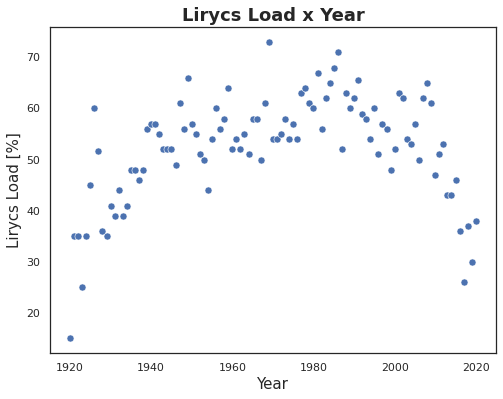

In [88]:
# TESTAR HISTOGRAMAS

plt.figure(figsize=(8,6))
sns.set_style('white')
sns.scatterplot(x =summary['year'], y =summary['qnt_load_%'],s=50)
plt.xlabel('Year',fontsize = 15) #caracteristica das labels 
plt.ylabel('Lirycs Load [%]',fontsize = 15)
plt.title("Lirycs Load x Year",fontsize = 18,weight='bold')
plt.show()

In [7]:
#We can identify that we managed to extract less music between the years 1920-1940 and between 2000-2020
#let's investigate the occurrence further

low_load_group1 = years_1920_2020[(years_1920_2020['year']<=1940) & (years_1920_2020['lyrics']=='0')].reset_index(drop=True)
low_load_group2 = years_1920_2020[(years_1920_2020['year']>=2000) & (years_1920_2020['lyrics']=='0')].reset_index(drop=True)

no_artist = low_load_group1[low_load_group1['artist'] == 'vários-intérpretes']
print(f'There are {len(no_artist)} ocurrences of vários-intérpretes as artists between the years 1920-1940')

There are 27 ocurrences of vários-intérpretes as artists between the years 1920-1940


The low number of songs found for the first group (1920-1940) can easily be explained by the amount of currently unknown artists, an example is that the list has 27 artists with the name 'vários interpretes' or 'several interpreters' in english.


Now, the second group (2000-2020) is a little tricky. If we falow the logic that the older the less lyrics we will find, we should expect to have the highest "find-rates" here, and what we see is the opposite.

Analyzing the group in question, we noticed that most of the lyrics not found are related to songs with the participation of several artists. As the website only uses the name of the main artist, songs with participation are not found.

We formulate the hypothesis that in the 21st century the format of music  with the participation of other artists was popularized . This hypothesis will be tested below.

In [8]:
#we can identify some patterns in the names of the artists of songs with participation.
#usually the name contains one of the following terms: ['feat' , '-ft' , '/'] 
#We will use that premise to make our analysis. 

def find_participation(row):
  matches_list = re.findall(r'feat|-ft|/|\\',str(row.artist))
  if len(matches_list) == 0:
    return 0
  else: 
    return 1

years_1920_2020['has_participation'] = years_1920_2020.apply(find_participation,axis = 1)
years_1920_2020[years_1920_2020['has_participation'] == True]

,music,artist,year,position,lyrics,has_participation
367,Rhapsody-In-Blue,George-Gershwin/Paul-Whiteman’s-Concert-Orchestra,1928.0,28.0,0,1
1085,Stormy-Weather,Leo-Reisman-featuring-Harold-Arlen,1935.0,46.0,Don't know why. There's no sun up in the sky....,1
2302,Linda,Ray-Noble-ft-Buddy-Clark,1947.0,63.0,0,1
2333,To-Each-His-Own,Modernaires-ft-Paula-Keely,1947.0,94.0,0,1
2980,Vaya-Con-Dios,Trio-Los-Panchos-ft-Enrique-Caceres,1954.0,41.0,"Tú, yo, . la luna, el sol. . Ella, él, . la r...",1
...,...,...,...,...,...,...
9611,O-Brasil-tem-que-ver,Turma-do-Pagode-ft-Kevinho,2020.0,73.0,0,1
9612,Quarta-cadeira,Matheus-e-Kauan-ft-Jorge-e-Mateus,2020.0,74.0,0,1
9613,Senorita,Shawn-Mendes-ft-Camila-Cabello,2020.0,75.0,I love it when you call me señorita. I wish I...,1
9617,Apaixonadinha,Marília-Mendonça-ft-Léo-Santana,2020.0,79.0,0,1


In [9]:
#Adds to the summary a column with the number of songs with the participation of other artists 

years_1920_2020_yes = years_1920_2020[years_1920_2020['has_participation']==1]
years_1920_2020_yes = years_1920_2020_yes.reset_index(drop = True)

number_of_participation = years_1920_2020.groupby('year').has_participation.sum()
summary= summary.merge(number_of_participation, on = 'year')
summary

,year,total_qnt,qnt_not_load_%,qnt_load_%,has_participation
0,1920.0,40,85.0,15.0,0
1,1921.0,40,65.0,35.0,0
2,1922.0,40,65.0,35.0,0
3,1923.0,40,75.0,25.0,0
4,1924.0,40,65.0,35.0,0
...,...,...,...,...,...
96,2016.0,100,64.0,36.0,8
97,2017.0,100,74.0,26.0,2
98,2018.0,100,63.0,37.0,14
99,2019.0,100,70.0,30.0,16


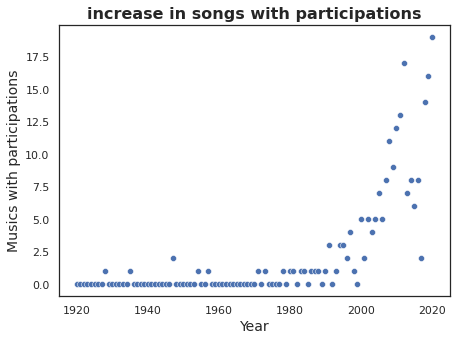

In [86]:
plt.figure(figsize=(7,5))

plot_1 = plt.figure(1)
sns.scatterplot(x =summary['year'], y =summary['has_participation'])
plt.xlabel('Year',fontsize = 14) #caracteristica das labels 
plt.ylabel('Musics with participations',fontsize = 14)
plt.title("increase in songs with participations",fontsize = 16, weight='bold')
plt.show()

From the graph we can confirm our hypothesis. We can definitely observe that from the 2000s onwards there is an increase in the popularity of songs with participation of other artists. Furthermore, there is a clear growth trend on the chart, strengthening even more this concept.

We can therefore infer that a good strategy to reach the list of most listened songs is to form partnerships with other bands. 


In [11]:
# we will continue improving our DF adding information about the lyrics language.

def detect_language(df):
  if df.lyrics == '0':
    return '0'
  else:
    try:
      language = detect(df.lyrics)
      return language
    except:
      return '0'

years_1920_2020['language'] = years_1920_2020.apply(detect_language, axis = 1)
years_1920_2020

,music,artist,year,position,lyrics,has_participation,language
0,Fala-Meu-Louro,Francisco-Alves,1920.0,1.0,A Bahia não dá mais coco. para botar na tapio...,0,pt
1,Quem-Vem-Atrás-Fecha-a-Porta,Bahiano-&-Izaltina,1920.0,2.0,0,0,0
2,Caboca-Bunita,Mário-Pinheiro,1920.0,3.0,0,0,0
3,Pois-Não,Orquestra-Eduardo-Souto,1920.0,4.0,0,0,0
4,Dardanella,Ben-Selvin,1920.0,5.0,"I'm just a woman, a lonely woman. Waiting on ...",0,en
...,...,...,...,...,...,...,...
9634,Fica,BFF-Girls,2020.0,96.0,Você me conhece tão bem. Por tudo que passamo...,0,pt
9635,Break-my-heart,Dua-Lipa,2020.0,97.0,I've always been the one to say the first goo...,0,en
9636,Casal-raiz,Xand-Avião,2020.0,98.0,0,0,0
9637,Chega-chora,Diego-e-Arnaldo,2020.0,99.0,Sabe aquele alguém que é especialista em te d...,0,pt


In [12]:
#Enter with a row of our summary (one func for each language)
#Return the percentage of lyrics in the language 

def pt_sumarry(df):
  pt_year_qnt = years_1920_2020[(years_1920_2020['language']=='pt') & (years_1920_2020['year'] == df.year)]
  lyrics_load = df.total_qnt * df['qnt_load_%']/100
  porcent_pt_songs  = 100* len(pt_year_qnt)/ lyrics_load
  return round(porcent_pt_songs,2)

def en_sumarry(df):
  en_year_qnt = years_1920_2020[(years_1920_2020['language']=='en') & (years_1920_2020['year'] == df.year)]
  lyrics_load = df.total_qnt * df['qnt_load_%']/100
  porcent_en_songs  = 100* len(en_year_qnt)/ lyrics_load
  return round(porcent_en_songs,2)

def es_sumarry(df):
  es_year_qnt = years_1920_2020[(years_1920_2020['language']=='es') & (years_1920_2020['year'] == df.year)]
  lyrics_load = df.total_qnt * df['qnt_load_%']/100
  porcent_es_songs  = 100* len(es_year_qnt)/ lyrics_load
  return round(porcent_es_songs,2)

def it_sumarry(df):
  it_year_qnt = years_1920_2020[(years_1920_2020['language']=='it') & (years_1920_2020['year'] == df.year)]
  lyrics_load = df.total_qnt * df['qnt_load_%']/100
  porcent_it_songs  = 100* len(it_year_qnt)/ lyrics_load
  return round(porcent_it_songs,2)

def fr_sumarry(df):
  fr_year_qnt = years_1920_2020[(years_1920_2020['language']=='fr') & (years_1920_2020['year'] == df.year)]
  lyrics_load = df.total_qnt * df['qnt_load_%']/100
  porcent_fr_songs  = 100* len(fr_year_qnt)/ lyrics_load
  return round(porcent_fr_songs,2)

summary['pt_songs_%'] = summary.apply(pt_sumarry, axis = 1)
summary['en_songs_%'] = summary.apply(en_sumarry, axis = 1)
summary['es_songs_%'] = summary.apply(es_sumarry, axis = 1)
summary['it_songs_%'] = summary.apply(it_sumarry, axis = 1)
summary['fr_songs_%'] = summary.apply(fr_sumarry, axis = 1)
summary.head()

,year,total_qnt,qnt_not_load_%,qnt_load_%,has_participation,pt_songs_%,en_songs_%,es_songs_%,it_songs_%,fr_songs_%
0,1920.0,40,85.0,15.0,0,16.67,83.33,0.00,0.0,0.0
1,1921.0,40,65.0,35.0,0,0.00,71.43,14.29,0.0,0.0
2,1922.0,40,65.0,35.0,0,0.00,92.86,7.14,0.0,0.0
3,1923.0,40,75.0,25.0,0,20.00,60.00,20.00,0.0,0.0
4,1924.0,40,65.0,35.0,0,0.00,78.57,7.14,0.0,0.0


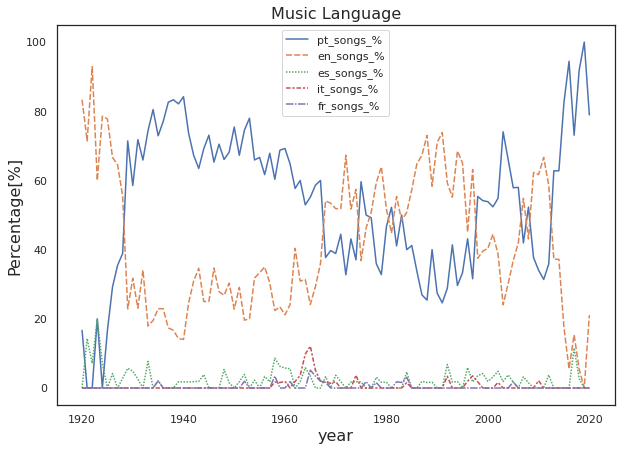

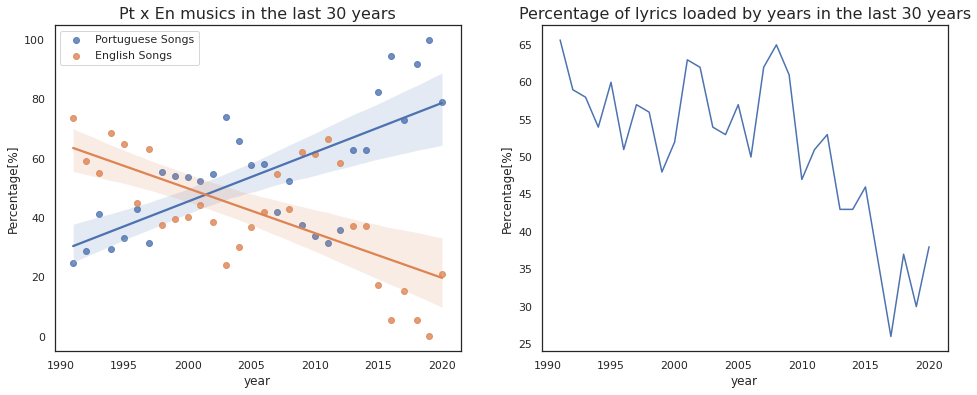

In [90]:

plt.figure(figsize=(10,7))
plt.xlabel('year',fontsize = 16) 
plt.ylabel('Percentage[%]',fontsize = 16)
plt.title("Music Language",fontsize = 16)
sns.lineplot(data = summary.set_index('year')[['pt_songs_%','en_songs_%','es_songs_%','it_songs_%', 'fr_songs_%']])


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.regplot(x='year',y= 'pt_songs_%',data = summary[summary['year']>1990], label='Portuguese Songs', ax = ax1)
sns.regplot(x='year',y= 'en_songs_%',data = summary[summary['year']>1990], label='English Songs' , ax = ax1)
ax1.set(xlabel="year",ylabel="Percentage[%]")
ax1.set_title("Pt x En musics in the last 30 years",fontsize = 16)
ax1.legend()

summary_last_30 = summary[summary['year']>1990]
sns.lineplot(x =summary_last_30['year'] , y = summary_last_30['qnt_load_%'] , ax = ax2)
ax2.set(xlabel="year",ylabel="Percentage[%]")
plt.title("Percentage of lyrics loaded by years in the last 30 years",fontsize = 16)
plt.show()

We can cleary see that in the last dacade there is an increases in portuguese songs between the most listened songs in radios.
But before jumping to conclusions, this information should be taken carefully. After all, we detect the language only of the songs that we were able to find the lyrics, meaning that our sample sizes vary from approx. 65 to 25 songs per year. We tried to avoid bigger problems using percentage rates, but still, our sample size may not be representative enouth.

In general, we can say that over the last 30 years, there is a growing trend of songs in Portuguese among the top 100 most listened to songs. although the limited number of samples increases the uncertainty.


# PART III - Lyrics Analisys



In [ ]:
!pip install langdetect
!pip install -U textblob
!python -m textblob.download_corpora
import nltk
from langdetect import detect
from textblob import TextBlob
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import re
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
sns.set()



In [15]:
summary.head()

,year,total_qnt,qnt_not_load_%,qnt_load_%,has_participation,pt_songs_%,en_songs_%,es_songs_%,it_songs_%,fr_songs_%
0,1920.0,40,85.0,15.0,0,16.67,83.33,0.00,0.0,0.0
1,1921.0,40,65.0,35.0,0,0.00,71.43,14.29,0.0,0.0
2,1922.0,40,65.0,35.0,0,0.00,92.86,7.14,0.0,0.0
3,1923.0,40,75.0,25.0,0,20.00,60.00,20.00,0.0,0.0
4,1924.0,40,65.0,35.0,0,0.00,78.57,7.14,0.0,0.0


In [16]:
#Adding a concatenet string (all lyrics) to our summary
#We are going to separete them by language (pt, en) 

def concat_pt_lyrics (df):
  year_df = years_1920_2020[(years_1920_2020['language']=='pt') & (years_1920_2020['year'] == df.year)]
  concat_lyric = ' '
  concat_lyric = concat_lyric.join(year_df['lyrics'])
  return concat_lyric

def concat_en_lyrics (df):
  year_df = years_1920_2020[(years_1920_2020['language']=='en') & (years_1920_2020['year'] == df.year)]
  concat_lyric = ' '
  concat_lyric = concat_lyric.join(year_df['lyrics'])
  return concat_lyric

summary['concat_pt_lyrics'] = summary.apply(concat_pt_lyrics, axis = 1)
summary['concat_en_lyrics'] = summary.apply(concat_en_lyrics, axis = 1)

summary.head()

,year,total_qnt,qnt_not_load_%,qnt_load_%,has_participation,pt_songs_%,en_songs_%,es_songs_%,it_songs_%,fr_songs_%,concat_pt_lyrics,concat_en_lyrics
0,1920.0,40,85.0,15.0,0,16.67,83.33,0.00,0.0,0.0,A Bahia não dá mais coco. para botar na tapio...,"I'm just a woman, a lonely woman. Waiting on ..."
1,1921.0,40,65.0,35.0,0,0.00,71.43,14.29,0.0,0.0,,I had a big surprise today. While I was watch...
2,1922.0,40,65.0,35.0,0,0.00,92.86,7.14,0.0,0.0,,"Life is not a highway strewn with flowers,. S..."
3,1923.0,40,75.0,25.0,0,20.00,60.00,20.00,0.0,0.0,Hoje eu acordei mais cedo. Não tomei meu café...,All through the night. I delight in your love...
4,1924.0,40,65.0,35.0,0,0.00,78.57,7.14,0.0,0.0,,If a nightengale could sing like you. Theyd s...


In [21]:

def words_frequence (language, index_n):
  col_string =   'concat_' + language +'_lyrics'
  raw_year_string = str(summary[col_string][index_n])
  if language == 'pt':
    year_string = re.sub(
        'quer|quem|assim|para|tudo|quando|você|quero|como|mais|dela|minha|esse|teve|'
        ,'',raw_year_string)  
  elif language == 'en':
    year_string = re.sub(
        'your|that|will|like|just|need|there|when|come|make|there|know|with|around |what|every|this|then'
        ,'',raw_year_string)
  else:
    year_string = raw_year_string
  try:
    raw_words = nltk.word_tokenize(year_string)
    words = [word.lower() for word in raw_words if len(word)>3]

    word_counter = len(words)
    words_frquence = FreqDist(words)
    words_sorted = sorted(words_frquence, key = words_frquence.get, reverse = True)
    top_10_words = words_sorted[:5]
    words_frquence_sorted = [(word , words_frquence.get(word)) for word in top_10_words ]
    return words_frquence_sorted,word_counter 
  except:
    return year_string, 0



In [22]:

def frequence_df(language):  
  column_word = ['word_' + str(i) for i in range(1,6)]
  column_count = ['count_rate_' + str(i) for i in range(1,6)]
  final_column = ['year','words_counter']
  for i in range(len(column_word)):
    final_column.append(column_word[i])
    final_column.append(column_count[i])
  word_frequence_df = pd.DataFrame(columns = final_column, index = range(101))
  for i in range (101):
    year_word_freq = words_frequence(language, i)[0]
    word_frequence_df['words_counter'][i] = words_frequence(language, i)[1]  
    for j in range (1,6):
      w1 = 'word_' + str(j)
      c1 = "count_rate_" + str(j)
      try:
        word_frequence_df[w1][i] = year_word_freq[j-1][0]
        word_frequence_df[c1][i] =  round(year_word_freq[j-1][1] *100 / pt_word_frequence_df['words_counter'][i],2)
      except:
        word_frequence_df[w1][i] = 0
        word_frequence_df[c1][i] = 0
  word_frequence_df['year'] = [i for i in range(1920,2021)]
  return word_frequence_df


In [34]:
pt_word_frequence_df = frequence_df('pt')
pt_word_frequence_df[45:55]

,year,words_counter,word_1,count_rate_1,word_2,count_rate_2,word_3,count_rate_3,word_4,count_rate_4,word_5,count_rate_5
45,1965,2063,amor,2.13,tenho,1.16,esquim,0.97,coração,0.87,carnaval,0.87
46,1966,2152,amor,3.72,bang,1.49,carnaval,1.44,vida,1.25,agora,1.12
47,1967,2061,amor,1.21,mundo,1.12,você,0.97,coração,0.92,cantar,0.92
48,1968,1673,amor,2.33,vida,1.85,mundo,1.73,temos,1.55,todo,1.49
49,1969,2028,amor,1.92,carnaval,1.68,casa,1.33,mundo,1.28,samba,1.28
50,1970,1448,amor,3.04,carnaval,1.17,vida,1.1,gente,1.1,quaquaraquaquá,1.1
51,1971,1831,amor,2.29,tudo,1.53,nada,1.15,dois,1.04,todo,0.93
52,1972,1068,aruanda,3.75,obrigado,2.34,senhor,2.25,têtêretê,2.25,amor,1.12
53,1973,2046,mosca,1.52,samba,1.42,carnaval,1.32,você,1.03,vida,0.98
54,1974,1486,amor,2.15,vida,1.55,pela,1.35,primeiro,1.21,andar,1.21


In [64]:
#Portuguese lyrics analysis

col = ['total_count_rate', 'value_counts']
pt_word_frequence_df1 = pt_word_frequence_df.copy()
word1_frequence = pt_word_frequence_df1[['word_1','count_rate_1']].groupby('word_1').agg([sum, len])
word1_frequence = word1_frequence[word1_frequence['count_rate_1']['len']>1]
word1_frequence.columns = col

word2_frequence = pt_word_frequence_df1[['word_2','count_rate_2']].groupby('word_2').agg([sum, len])
word2_frequence = word2_frequence[word2_frequence['count_rate_2']['len']>1]
word2_frequence.columns = col

word3_frequence = pt_word_frequence_df1[['word_3','count_rate_3']].groupby('word_3').agg([sum, len])
word3_frequence = word3_frequence[word3_frequence['count_rate_3']['len']>1]
word3_frequence.columns = col

word4_frequence = pt_word_frequence_df1[['word_4','count_rate_4']].groupby('word_4').agg([sum, len])
word4_frequence = word4_frequence[word4_frequence['count_rate_4']['len']>1]
word4_frequence.columns = col

word5_frequence = pt_word_frequence_df1[['word_5','count_rate_5']].groupby('word_5').agg([sum, len])
word5_frequence = word5_frequence[word5_frequence['count_rate_5']['len']>1]
word5_frequence.columns = col

#we will use our count rate as a weight, this way, we can create a final_word_rate with only one word list, but considering all the top five words
Final_word_rate = pd.concat([word1_frequence, word2_frequence, word3_frequence, word4_frequence, word5_frequence]).reset_index()

Final_word_rate= Final_word_rate.groupby('index',as_index = False).agg(
    {'value_counts':'sum',
     'total_count_rate':'sum'})
Final_word_rate.set_index('index',inplace=True)
Final_word_rate.drop(0, axis =0,inplace = True)

#it seen fair to exclude words with less then 1% of total count rate and words that appear less than 5 times in total 
#we are also deleting words that passed through our re filter but still doesn't offer an obviously meaning
Final_word_rate = Final_word_rate[Final_word_rate['total_count_rate'] >  Final_word_rate['total_count_rate'].sum()/100]
Final_word_rate = Final_word_rate[Final_word_rate['value_counts'] >  5]
Final_word_rate.drop(labels= ['você','quando','gente'], inplace=True)

#we are also adding a translation to our df, just to make it more understandable for no portuguese speakers 
Final_word_rate['en_translation'] = ['love', 'carnival' , 'heart', 'world', 'samba', 'miss', 'life']
Final_word_rate

,value_counts,total_count_rate,en_translation
index,,,
amor,92,193.78,love
carnaval,6,7.37,carnival
coração,24,28.64,heart
mundo,8,9.82,world
samba,6,7.73,samba
saudade,7,6.00,miss
vida,36,41.38,life


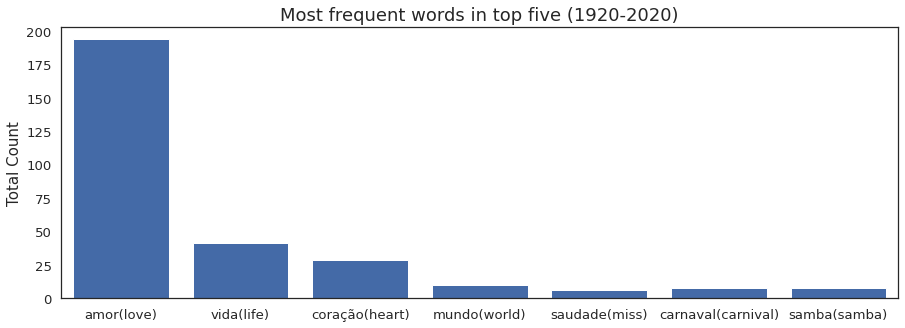

In [122]:
Final_word_rate.sort_values(by=['value_counts'],inplace=True, ascending = False)
labels = [Final_word_rate.index[i] + "(" + Final_word_rate['en_translation'][i] + ')' 
          for i in range(len(Final_word_rate.index))]
sizes = Final_word_rate['total_count_rate']

fig1, ax1 = plt.subplots(figsize=(15,5))

sns.barplot(x= labels,
            y=sizes,
            color = '#3366b8',
            ax = ax1)

ax1.set_title("Most frequent words in top five (1920-2020)",fontsize = 18)
sns.set_style('white')
sns.set(font_scale = 1.2)
plt.ylabel('Total Count',fontsize = 15)
plt.show()

#The percentage was defined using the five most frequent words in each year.
#For a better understanding of how the percentage was defined, please refer to the cell above.


In [57]:
en_word_frequence_df = frequence_df('en')

en_word_frequence_df[55:75]

,year,words_counter,word_1,count_rate_1,word_2,count_rate_2,word_3,count_rate_3,word_4,count_rate_4,word_5,count_rate_5
55,1975,2040,july,2.52,love,2.24,never,2.0,goodbye,1.67,woman,1.19
56,1976,2112,love,10.59,baby,3.57,sweet,2.07,night,2.01,bump,1.63
57,1977,2939,love,5.19,dancing,3.06,feel,2.36,josephine,2.31,dance,2.05
58,1978,4116,love,8.63,body,4.75,feel,4.31,float,3.77,macho,3.28
59,1979,4645,love,11.45,want,5.13,night,3.94,baby,3.5,freak,3.38
60,1980,3139,love,9.93,never,5.79,time,3.31,more,2.26,knew,2.21
61,1981,2912,think,3.32,love,3.28,over,2.86,just,1.58,they,1.45
62,1982,3064,love,3.51,time,3.26,give,3.06,baby,2.66,been,2.26
63,1983,3457,love,2.89,every,1.9,beat,1.54,take,1.31,world,1.25
64,1984,3348,night,6.68,time,4.04,love,2.91,heart,2.26,never,2.1


In [70]:
#Englsih lyrics analysis

col = ['total_count_rate', 'value_counts']

word1_frequence_en = en_word_frequence_df[['word_1','count_rate_1']].groupby('word_1').agg([sum, len])
word1_frequence_en = word1_frequence_en[word1_frequence_en['count_rate_1']['len']>1]
word1_frequence_en.columns = col

word2_frequence_en = en_word_frequence_df[['word_2','count_rate_2']].groupby('word_2').agg([sum, len])
word2_frequence_en = word2_frequence_en[word2_frequence_en['count_rate_2']['len']>1]
word2_frequence_en.columns = col

word3_frequence_en = en_word_frequence_df[['word_3','count_rate_3']].groupby('word_3').agg([sum, len])
word3_frequence_en = word3_frequence_en[word3_frequence_en['count_rate_3']['len']>1]
word3_frequence_en.columns = col

word4_frequence_en = en_word_frequence_df[['word_4','count_rate_4']].groupby('word_4').agg([sum, len])
word4_frequence_en = word4_frequence_en[word4_frequence_en['count_rate_4']['len']>1]
word4_frequence_en.columns = col

word5_frequence_en = en_word_frequence_df[['word_5','count_rate_5']].groupby('word_5').agg([sum, len])
word5_frequence_en = word5_frequence_en[word5_frequence_en['count_rate_5']['len']>1]
word5_frequence_en.columns = col

#we will use our count rate as a weight, this way, we can create a final_word_rate with only one word list, but considering all the top five words
Final_word_rate_en = pd.concat([word1_frequence_en, word2_frequence_en, word3_frequence_en, word4_frequence_en, word5_frequence_en]).reset_index()
Final_word_rate_en= Final_word_rate_en.groupby('index').agg(
    {'value_counts':'sum',
     'total_count_rate':'sum'})
Final_word_rate_en.drop(0, axis =0,inplace = True)

#it seen fair to exclude words with less then 1% of total count rate and words that appear less than 10 times in total 
#we are also deleting words that passed through our re filter but still doesn't offer an obviously meaning
Final_word_rate_en = Final_word_rate_en[Final_word_rate_en['total_count_rate'] >  Final_word_rate_en['total_count_rate'].sum()/100]
Final_word_rate_en = Final_word_rate_en[Final_word_rate_en['value_counts'] >  10]

Final_word_rate_en

,value_counts,total_count_rate
index,,
baby,31,93.18
love,83,359.32
never,15,59.31
time,23,65.36
yeah,19,65.87


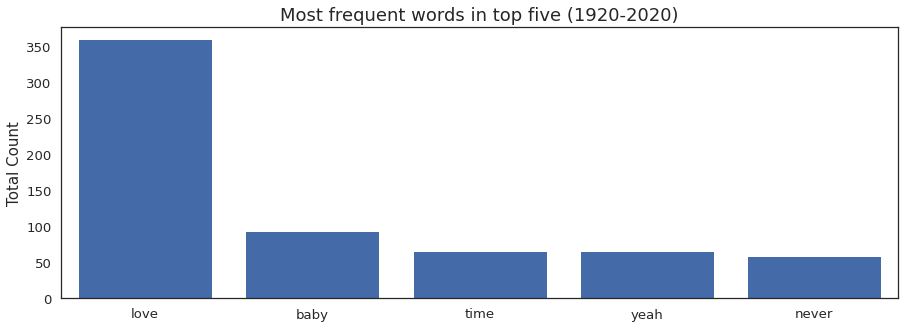

In [128]:
Final_word_rate_en.sort_values(by=['value_counts'],ascending=False, inplace = True)
labels = [i for i in Final_word_rate_en.index]
sizes = Final_word_rate_en['total_count_rate']
sns.set_style('white')
fig1, ax1 = plt.subplots(figsize=(15,5))

sns.barplot(x= labels,
            y=sizes,
            color = '#3366b8',
            ax = ax1)

ax1.set_title("Most frequent words in top five (1920-2020)",fontsize = 18)
plt.ylabel('Total Count',fontsize = 15)
ax1.set_title("Most frequent words in top five (1920-2020)",fontsize = 18)
plt.show()

#The percentage was defined using the five most frequent words in each year.
#For a better understanding of how the percentage was defined, please refer to the cell above.

Both in English and in Portuguese the most frequent word was love. Furthermore, in Portuguese the three most frequent words were related to romantic relationships, while in English the two most frequent words were related to the topic.

It is clear that among the most listened to songs on radios in Brazil, the most present theme involves love or romantic relationships.